In [1]:
import pandas as pd
import numpy as np
import polars as pl

In [2]:
# reading in dataframe created in TotalsMarket.ipynb
df = pd.read_csv('dataframe.csv')
df

,Unnamed: 0,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,...,63.875000,0.000000,0.0,0.0,0.0,0,0,-18.0,1,1.0
1,1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,...,67.895000,-6.240000,2.0,2.0,0.0,1,0,-1.0,1,6.0
2,2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,...,65.307826,0.000000,2.0,2.0,0.0,0,1,6.0,0,-37.0
3,3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,...,69.197391,-7.542391,1.0,1.0,0.0,1,1,9.0,0,-5.0
4,4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,...,63.560000,0.000000,0.0,0.0,0.0,1,0,-0.5,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,...,50.806400,0.000000,0.0,0.0,0.0,1,1,4.5,1,2.0
6702,6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,...,31.020800,-9.806400,1.0,1.0,0.0,0,1,5.5,0,-5.5
6703,6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,...,31.020800,2.894400,2.0,2.0,0.0,0,0,-17.0,0,-11.5
6704,6704,DET,31.0,SF,34.0,Home,3.0,65.0,0.0,7,...,23.502500,22.544700,3.0,5.0,2.0,1,1,12.5,0,-4.5


In [3]:
# splitting games into indoor and outdoor dataframes
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,Unnamed: 0,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,...,63.8750,0.0,0.0,0.0,0.0,0,0,-18.0,1,1.0
4,4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,...,63.5600,0.0,0.0,0.0,0.0,1,0,-0.5,1,20.0
6,6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,...,75.9725,0.0,0.0,0.0,0.0,1,0,-9.0,1,5.5
9,9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,...,60.1850,0.0,0.0,0.0,0.0,0,1,6.0,0,-17.5
10,10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,...,69.2600,0.0,0.0,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,6693,CLE,14.0,HOU,45.0,Home,31.0,59.0,0.0,6,...,28.5440,0.0,0.0,0.0,0.0,1,1,14.0,1,33.5
6695,6695,GB,48.0,DAL,32.0,Home,-16.0,80.0,0.0,7,...,21.0200,0.0,0.0,0.0,0.0,0,1,27.5,0,-23.0
6696,6696,LA,23.0,DET,24.0,Home,1.0,47.0,0.0,7,...,46.0472,0.0,0.0,0.0,0.0,1,0,-5.5,0,-2.5
6701,6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,...,50.8064,0.0,0.0,0.0,0.0,1,1,4.5,1,2.0


In [4]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,Unnamed: 0,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,...,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,...,67.895000,-6.240000,2.0,2.0,0.0,1,0,-1.0,1,6.0
2,2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,...,65.307826,0.000000,2.0,2.0,0.0,0,1,6.0,0,-37.0
3,3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,...,69.197391,-7.542391,1.0,1.0,0.0,1,1,9.0,0,-5.0
5,5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,...,69.197391,10.562609,1.0,1.0,0.0,1,0,-5.0,1,32.5
7,7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,...,66.837500,3.510000,1.0,1.0,0.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,HOU,10.0,BAL,34.0,Home,24.0,44.0,0.0,7,...,51.648800,-17.733600,1.0,3.0,2.0,1,0,0.0,1,14.0
6700,6700,GB,21.0,SF,24.0,Home,3.0,45.0,0.0,6,...,21.020000,25.027200,2.0,4.0,2.0,1,0,-5.5,0,-7.5
6702,6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,...,31.020800,-9.806400,1.0,1.0,0.0,0,1,5.5,0,-5.5
6703,6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,...,31.020800,2.894400,2.0,2.0,0.0,0,0,-17.0,0,-11.5


In [5]:
# sample game
df1 = df.iloc[2460]
df1

Unnamed: 0                                 2460
away_team                                   STL
away_score                                 19.0
home_team                                   WAS
home_score                                 17.0
location                                   Home
home_winning_margin                        -2.0
total                                      36.0
overtime                                    0.0
away_rest                                    14
home_rest                                     7
away_moneyline                            425.0
home_moneyline                           -550.0
spread_line                                12.0
away_spread_odds                         -111.0
home_spread_odds                          103.0
total_line                                 44.0
under_odds                               -113.0
over_odds                                 103.0
div_game                                      0
indoor_game                             

In [6]:
from scipy import stats
from tabulate import tabulate

# statistical tests to tests for variance in data
leveneIndoorScores = stats.levene(indoor_df['home_score'], indoor_df['away_score'])
leveneOutdoorScores = stats.levene(outdoor_df['home_score'], outdoor_df['away_score'])
bartlettIndoorScores = stats.bartlett(indoor_df['home_score'], indoor_df['away_score'])
bartlettOutdoorScores = stats.bartlett(outdoor_df['home_score'], outdoor_df['away_score'])
flignerIndoorScores = stats.fligner(indoor_df['home_score'], indoor_df['away_score'])
flignerOutdoorScores = stats.fligner(outdoor_df['home_score'], outdoor_df['away_score'])

print(tabulate(
    [
        ['Indoor scores p-value', 
         round(leveneIndoorScores.pvalue, 2), 
         round(bartlettIndoorScores.pvalue, 2),
         round(flignerIndoorScores.pvalue, 2)],

        ['Indoor scores statistical variance', 
         round(leveneIndoorScores.statistic, 2), 
         round(bartlettIndoorScores.statistic, 2),
         round(flignerIndoorScores.statistic, 2)],

        ['Outdoor scores p-value', 
         round(leveneOutdoorScores.pvalue, 2), 
         round(bartlettOutdoorScores.pvalue, 2),
         round(flignerOutdoorScores.pvalue, 2)],

         ['Outdoor scores statistical variance',
          round(leveneOutdoorScores.statistic, 2), 
         round(bartlettOutdoorScores.statistic, 2),
         round(flignerOutdoorScores.statistic, 2)]

         ], headers=['  ', 'Levene', 'Bartlett', 'Fligner'], tablefmt='grid'
))

+-------------------------------------+----------+------------+-----------+
|                                     |   Levene |   Bartlett |   Fligner |
+=====================================+==========+============+===========+
| Indoor scores p-value               |     0.39 |       0.07 |      0.43 |
+-------------------------------------+----------+------------+-----------+
| Indoor scores statistical variance  |     0.73 |       3.39 |      0.63 |
+-------------------------------------+----------+------------+-----------+
| Outdoor scores p-value              |     0.62 |       0.17 |      0.66 |
+-------------------------------------+----------+------------+-----------+
| Outdoor scores statistical variance |     0.25 |       1.85 |      0.19 |
+-------------------------------------+----------+------------+-----------+


In [244]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [245]:
# converting categorical data to numerical values
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [246]:
# converting categorical data to numerical values
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [247]:
# scaling data for model creation

# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','over_totals_win', 'over_winning_margin','div_game','home_win','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','over_totals_win', 'over_winning_margin','div_game','home_win','home_team_win_perecentage','away_team_win_perecentage','month_number']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\1931207960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','over_totals_win', 'over_winning_margin','div_game','home_win','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \


In [248]:
# scaling data for model creation
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','over_totals_win', 'over_winning_margin','div_game','temp','wind','home_win','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','over_totals_win', 'over_winning_margin','div_game','temp','wind','home_win','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_10528\1872389595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','over_totals_win', 'over_winning_margin','div_game','temp','wind','home_win','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference']] = \


In [249]:
from sklearn.model_selection import train_test_split

# splitting data into x and y for both testing and training and dropping irrelevant columns, target column and any column that mathematically gives away the target column value
indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = \
    train_test_split(indoor_df.drop(['home_spread_win','away_score','home_score', 'spread_line','home_spread_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), \
                     indoor_df['home_spread_win'], \
                        test_size=0.2)

In [250]:
from sklearn.model_selection import train_test_split

# splitting data into x and y for both testing and training and dropping irrelevant columns, target column and any column that mathematically gives away the target column value
outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_train, outdoor_with_acclimatisation_y_test = train_test_split(outdoor_df.drop(['home_spread_win','away_score','home_score', 'spread_line','home_spread_winning_margin', 'indoor_game'], axis=1), outdoor_df['home_spread_win'], test_size=0.2)
outdoor_without_acclimatisation_X_train, outdoor_without_acclimatisation_X_test, outdoor_without_acclimatisation_y_train, outdoor_without_acclimatisation_y_test = train_test_split(outdoor_df.drop(['home_spread_win','away_score','home_score', 'spread_line','home_spread_winning_margin','indoor_game','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimatisation_advantage','home_acclimatisation_category','away_acclimatisation_category','acclimatisation_category_difference'], axis=1), outdoor_df['home_spread_win'], test_size=0.2)

In [251]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model and printing score
indoor_model = LogisticRegression()
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.8492307692307692


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression acclimatised model and printing score
outdoor_with_acclimatisation_model = LogisticRegression()
outdoor_with_acclimatisation_model.fit(outdoor_with_acclimatisation_X_train, outdoor_with_acclimatisation_y_train)
print(outdoor_with_acclimatisation_model.score(outdoor_with_acclimatisation_X_test, outdoor_with_acclimatisation_y_test)) 

outdoor_with_acclimatisation_X_train

0.943952802359882


,Unnamed: 0,away_team,home_team,location,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,...,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimatisation_advantage,home_acclimatisation_category,away_acclimatisation_category,acclimatisation_category_difference,home_win,over_totals_win,over_winning_margin
2469,2469,20,5,0,0.312216,3.239773,-0.252707,-0.247047,-0.256846,0.374558,...,0.038714,-0.259565,-0.395173,0.189290,-0.544347,0.214774,0.705188,0.873505,1.04944,3.746055
5169,5169,21,3,0,-1.453737,-0.864298,-0.252707,0.260328,0.221890,-4.380644,...,0.038714,0.018563,0.211263,-0.229278,-0.544347,0.214774,0.705188,-1.144813,-0.95289,-0.998776
3039,3039,15,23,0,0.040531,-0.015180,3.957148,-0.247047,-0.256846,-0.678089,...,0.407769,0.038164,-0.593467,0.806734,-0.544347,0.214774,0.705188,0.873505,1.04944,0.113294
145,145,4,7,0,-1.114131,0.338620,-0.252707,-0.247047,-0.256846,-0.243212,...,0.407769,-0.726290,0.021622,-0.911827,-0.544347,-0.728413,-0.411030,-1.144813,1.04944,0.891742
1315,1315,2,7,0,0.991429,-1.430377,-0.252707,-0.247047,-0.256846,-0.243212,...,-0.330341,0.861446,1.114664,-0.322920,-0.544347,-0.728413,-0.411030,0.873505,-0.95289,-1.072914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,2,13,0,-0.366997,0.126340,-0.252707,-0.247047,-0.256846,-0.243212,...,0.407769,0.446086,-0.370165,1.030358,0.802866,2.101149,1.821407,-1.144813,1.04944,0.780535
1116,1116,7,25,0,-1.521659,0.197100,-0.252707,-0.247047,-0.256846,-0.243212,...,0.038714,0.276030,0.264404,0.022256,-0.544347,-0.728413,-0.411030,-1.144813,1.04944,0.261569
4815,4815,22,4,0,-1.589580,0.267860,-0.252707,-0.247047,-0.256846,0.634672,...,-0.330341,1.614753,1.180830,0.525324,-0.544347,0.214774,0.705188,-1.144813,1.04944,0.002087
4238,4238,2,25,0,-1.046210,0.267860,-0.252707,-0.754423,-0.735583,0.350172,...,-3.282777,-1.735391,-1.340587,-0.446855,0.802866,0.214774,-0.411030,-1.144813,-0.95289,-0.072051


In [253]:
# Train the logistic regression non-acclimatised model and printing score

outdoor_without_acclimatisation_model = LogisticRegression()
outdoor_without_acclimatisation_model.fit(outdoor_without_acclimatisation_X_train, outdoor_without_acclimatisation_y_train)
print(outdoor_without_acclimatisation_model.score(outdoor_without_acclimatisation_X_test, outdoor_without_acclimatisation_y_test)) 

0.887905604719764


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [254]:
from sklearn.model_selection import KFold

# kfold cross-validation for testing accuracy robustness
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [255]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(outdoor_with_acclimatisation_model, 
                         outdoor_with_acclimatisation_X_train, 
                         outdoor_with_acclimatisation_y_train, 
                         cv=kf, scoring='accuracy')

In [234]:
print(f"Accuracy Score for each fold: {[round(score, 2) for score in scores]}")
print(f"Average accuracy across {k} folds: {scores.mean():.2f}")
print(f"Standard deviation across {k} folds: {scores.std():.2f}")

Accuracy Score for each fold: [0.86, 0.87, 0.86, 0.91, 0.9]
Average accuracy across 5 folds: 0.88
Standard deviation across 5 folds: 0.02


In [235]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, root_mean_squared_error
from tabulate import tabulate

# create prediction values for scoring
indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_with_acclimatisation_y_pred = outdoor_with_acclimatisation_model.predict(outdoor_with_acclimatisation_X_test)
outdoor_without_acclimatisation_y_pred = outdoor_without_acclimatisation_model.predict(outdoor_without_acclimatisation_X_test)

In [236]:
print(tabulate(
    [
        ['Accuracy score', 
         round(accuracy_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(accuracy_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1), 
         round(accuracy_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

        ['F1 score', 
         round(f1_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(f1_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1), 
         round(f1_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

        ['Precision score', 
         round(precision_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(precision_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
         round(precision_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1), ],

         ['Recall Score',
          round(recall_score(indoor_y_test, indoor_y_pred)*100, 1), 
          round(recall_score(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
          round(recall_score(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],

          ['Mean Squared Error',
           round(mean_squared_error(indoor_y_test, indoor_y_pred)*100, 1), 
           round(mean_squared_error(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
           round(mean_squared_error(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)],
           
         
         ['Root Mean Squared Error',
           round(root_mean_squared_error(indoor_y_test, indoor_y_pred)*100, 1), 
           round(root_mean_squared_error(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)*100, 1),
           round(root_mean_squared_error(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)*100, 1)]

         ], headers=['  ', 'Indoor', 'Outdoor with acclimatisation', 'Outdoor without acclimatisation'], tablefmt='grid'
))

+-------------------------+----------+--------------------------------+-----------------------------------+
|                         |   Indoor |   Outdoor with acclimatisation |   Outdoor without acclimatisation |
+=========================+==========+================================+===================================+
| Accuracy score          |     86.8 |                           89   |                              89.5 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| F1 score                |     87.3 |                           88.8 |                              88.6 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| Precision score         |     86.5 |                           86.4 |                              88.7 |
+-------------------------+----------+--------------------------------+-----------------------------------+
| Recall Score            | 

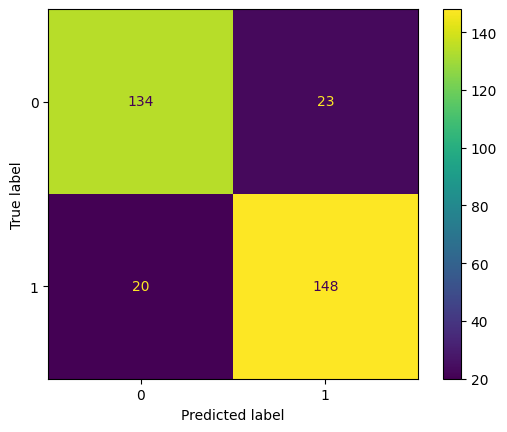

In [237]:
from sklearn import metrics
import matplotlib.pyplot as plt

# confusion matrix for indoor model
confusion_matrix = metrics.confusion_matrix(indoor_y_test, indoor_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

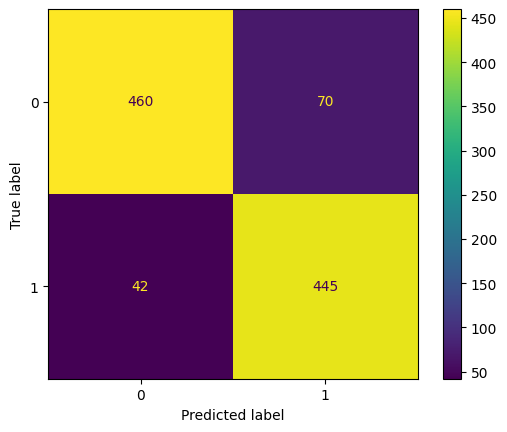

In [238]:
# confusion matrix for acclimatised model
confusion_matrix = metrics.confusion_matrix(outdoor_with_acclimatisation_y_test, outdoor_with_acclimatisation_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

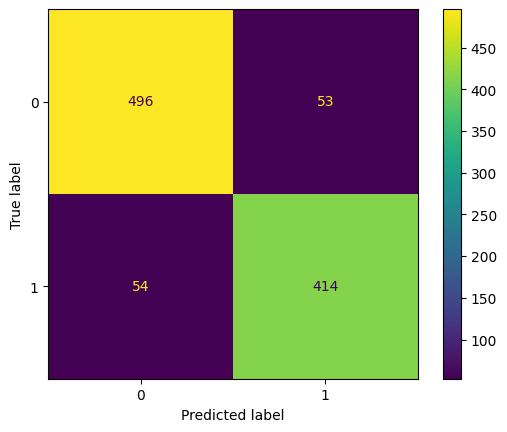

In [239]:
# confusion matrix for non-acclimatised model
confusion_matrix = metrics.confusion_matrix(outdoor_without_acclimatisation_y_test, outdoor_without_acclimatisation_y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 